In [1]:
import pickle
import numpy as np
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

clf=[
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto')),
     make_pipeline(StandardScaler(), SVC(gamma='auto'))]


In [112]:
x=[[],[],[],[],[],[],[],[],[],[],[],[],[]]
f=open('x_female_slt_data.txt','rb')
while True:
    try:
        a=pickle.load(f)
        for i in range(13):
            x[i].append(a[i].detach().numpy())
    except EOFError as e:
        break


In [148]:
x1=[[],[],[],[],[],[],[],[],[],[],[],[],[]]
f=open('x_male_bdl.txt','rb')
while True:
    try:
        a=pickle.load(f)
        for i in range(13):
            x1[i].append(a[i].detach().numpy())
    except EOFError as e:
        break


In [149]:
x_com=[[],[],[],[],[],[],[],[],[],[],[],[],[]]

In [150]:
for i in range(len(x)):
    x_com[i]=np.asarray(x[i]+x1[i])

In [151]:
y=np.ones((1200,))
y[0:600]=0

In [152]:
#x_com[0].shape
#y1=y.reshape(1, -1)

In [153]:
#y2=y1.T

In [154]:
x_com[1].shape

(1200, 768)

In [155]:
y.shape

(1200,)

In [156]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [157]:
accuracy=[]

for i in range(len(clf)):
    X_train, X_test, y_train, y_test = train_test_split(x_com[i], y, test_size=0.40, random_state=42)
    clf[i].fit(X_train,y_train)
    y_pred=clf[i].predict(X_test)
    accuracy.append(len(np.where((y_pred-y_test)==0)[0])/len(y_test))


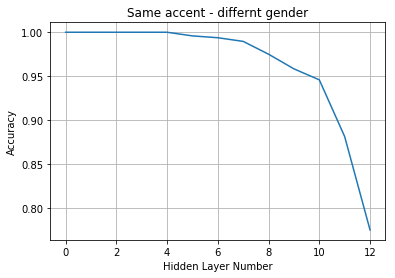

In [161]:
plt.plot(range(len(accuracy)),accuracy)
plt.xlabel("Hidden Layer Number")
plt.ylabel("Accuracy")
plt.title('Same accent - differnt gender')
plt.grid()
plt.show()

## Different Accent Differnt Gender

In [144]:
x1=[[],[],[],[],[],[],[],[],[],[],[],[],[]]
f=open('x_male_jmk.txt','rb')
while True:
    try:
        a=pickle.load(f)
        for i in range(13):
            x1[i].append(a[i].detach().numpy())
    except EOFError as e:
        break


In [145]:
for i in range(len(x)):
    x_com[i]=np.asarray(x[i]+x1[i])

accuracy=[]

for i in range(len(clf)):
    X_train, X_test, y_train, y_test = train_test_split(x_com[i], y, test_size=0.40, random_state=42)
    clf[i].fit(X_train,y_train)
    y_pred=clf[i].predict(X_test)
    accuracy.append(len(np.where((y_pred-y_test)==0)[0])/len(y_test))
    

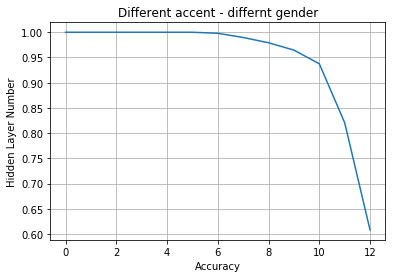

In [147]:
plt.plot(range(len(accuracy)),accuracy)
plt.xlabel("Accuracy")
plt.ylabel("Hidden Layer Number")
plt.title('Different accent - differnt gender')
plt.grid()
plt.show()